## Google Stock Prediction with RNN-LSTM

### Part 1: Data Preprocessing

##### Loading Utilities

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [27]:
train_df = pd.read_csv("C:/Users/tze/OneDrive/Deep Learning/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv")
test_df =  pd.read_csv("C:/Users/tze/OneDrive/Deep Learning/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Test.csv")
training_set = train_df.iloc[:, 1:2].values

#####  Feature Scaling

Normally feature scaling is done after splitting data into training and test sets.<br>
Here, data have been already split in two separate datasets for the training and test so we merely apply the scaling.

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
train_scaled = scaler.fit_transform(training_set)

#### Feature Extraction

- In order to predict the next output we use 60 times steps in the past.<br>
- This value was heuristic as small values may lead to overfitting and large value to underfitting. <br>
- The LSTM will try to identify and learn the underlying trend from the past values and based on what the next value will be predicted.

In [29]:
# Creating data structure with 60 timesteps and 1 output
X_train = []
y_train =[]
for i in range(60, len(train_df)):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping features
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 

### Part 2: Building LSTM

In [30]:
# Loading necessaries
from keras.models import Sequential
from keras.layers import (LSTM, Dense, Dropout)

#### Initialization and Layers

In [31]:
# Initialization
regressor = Sequential()

# LSTM Layers
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1) ))
regressor.add(Dropout(0.20))
#
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.20))
#
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.20))
#
regressor.add(LSTM(units = 50 ))
regressor.add(Dropout(0.20))

# Output Layer
regressor.add(Dense(units= 1))

#### Compiling  and Fitting RNN

In [32]:
# Compilation
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 44s 299ms/step - loss: 0.0315
Epoch 2/100
38/38 [==============================] - 11s 298ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 11s 286ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 11s 290ms/step - loss: 0.0060
Epoch 5/100
38/38 [==============================] - 10s 275ms/step - loss: 0.0068
Epoch 6/100
38/38 [==============================] - 11s 294ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 11s 300ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 12s 315ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0049
Epoch 11/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0043
Epoch

### Predictions

In [33]:
# Getting the test set
test_set = test_df.iloc[:, 1:2].values
# Getting complete dataset
total_dataset = pd.concat((train_df['Open'], test_df['Open']), axis = 0)
inputs = total_dataset[len(total_dataset) - len(test_df) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

# Here y_train isn't extracted as it has to be predicted
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Prediction
predicted_set = regressor.predict(X_test)
predicted_set = scaler.inverse_transform(predicted_set)


1/1 [==============================] - 3s 3s/step


### Visualization


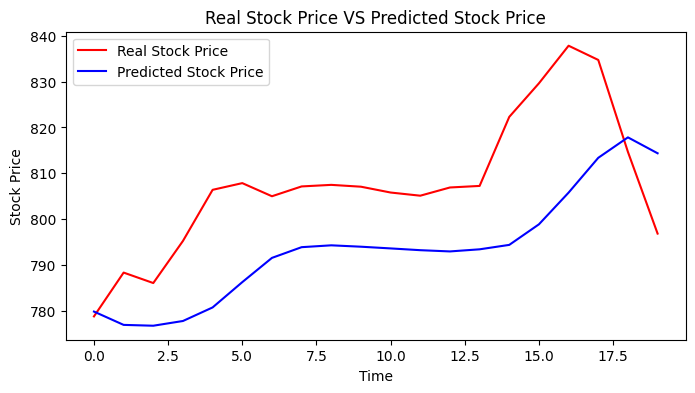

In [41]:
plt.figure(figsize = (8, 4))
plt.plot(test_set, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_set, color = 'blue', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Real Stock Price VS Predicted Stock Price')
plt.legend()
plt.show()